In [1]:
from typing import Set
import random

from dbst_sat import DBSTSolverSAT, GreedyDBST, draw_edges, Node

# Solving DBST using (Cardinality-)SAT
For a general idea of how to tackle optimization problems utilizing a SAT-solver, we have already seen an example on the first sheet. There, you can find extensively documented code on a SAT-based solver for the Feedback Vertex Set problem.

Essentially, for a parameter $k$ that is to be optimized using a SAT-solver, we implement the decision problem for a fixed value of $k$ and iteratively vary its value, until we find the smallest/largest feasible value.

In our case, the parameter is the bottleneck length. The decision variant of the problem is then:
For a given degree constraint $d$ and a given bottleneck length $k$, does there exist a spanning tree in G which obeys the degree- and bottleneck constraints?

The smallest $k$ is then searched for using binary search.

## Point/Coordinate Generators
Feel free to add your own instance generators.

In [2]:
def random_points(n, w=10_000, h=10_000) -> Set[Node]:
    """
    n random points with integer coordinates within the w * h rectangle.
    :param n: Number of points
    :param w: The width of the rectangle.
    :param h: The height of the rectangle.
    :return: A set of points as (x,y)-tuples.
    """
    return set((random.randint(0,w), random.randint(0,h)) for _ in range(n))

## DBST Solver
We generate a set of 40 random coordinates and find the DBST with minimum bottleneck and degree constraint d = 3.

New best bottleneck: 5964.387646690982!
New best bottleneck: 3831.75377601432!
New best bottleneck: 2793.7940153132263!
The bottleneck 2063.6048555864563 created an unconnected graph!
New best bottleneck: 2396.5212287814184!
The bottleneck 2226.8084785180786 created an unconnected graph!
The bottleneck 2268.8750516500463 created an unconnected graph!
The bottleneck 2293.3715355345284 created an unconnected graph!
The bottleneck 2379.4144237606024 created an unconnected graph!


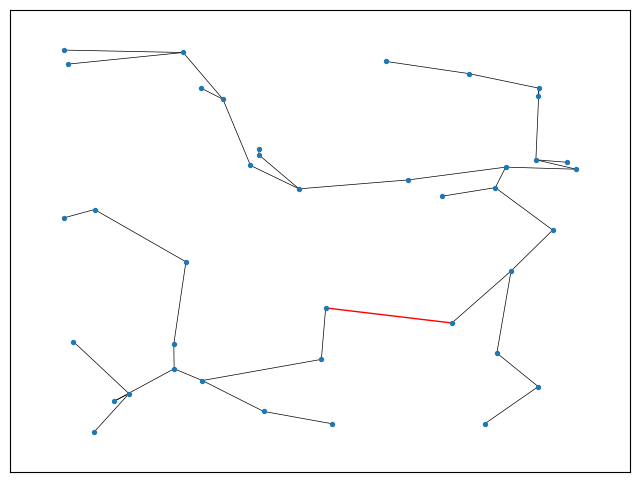

In [3]:
points = random_points(40)
solver = DBSTSolverSAT(points, 3)
edges = solver.solve()
draw_edges(edges)

## DBST Solver with Heuristic Start Solution
The solver is implemented in a way such that a heuristic start solution can be given as parameter to the constructor.
Especially for this problem, providing a heuristic start solution can drastically reduce the amount of time spent in optimization, if implemented right.

Notice how small the time spent in the following cell is compared to the cell above?

Greedy bottleneck: 2221.343062203585


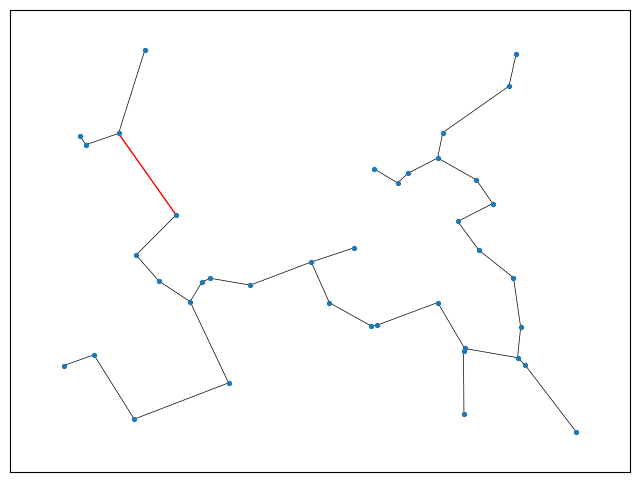

The bottleneck 1744.7544239806357 created an unconnected graph!
The bottleneck 1974.8605014025675 created an unconnected graph!
The bottleneck 2069.297706952772 created an unconnected graph!
The bottleneck 2142.916237280403 created an unconnected graph!
The bottleneck 2182.6234214815895 created an unconnected graph!
The bottleneck 2183.5278793731945 created an unconnected graph!
The bottleneck 2219.7794935533575 created an unconnected graph!


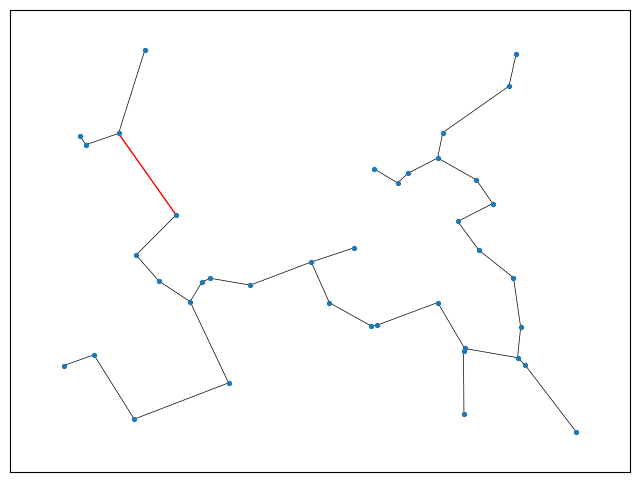

In [4]:
greedy = GreedyDBST(points, 3)
greedy_edges = greedy.solve()
draw_edges(greedy_edges)
solver = DBSTSolverSAT(points, 3, solution=greedy_edges)
edges = solver.solve()
draw_edges(edges)

Greedy bottleneck: 3851.9637848764883


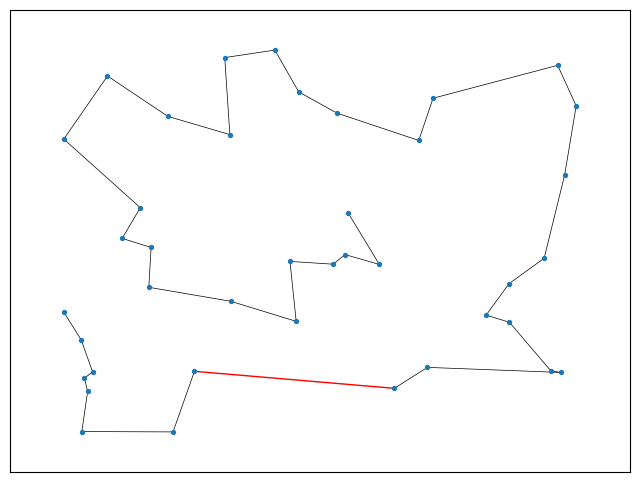

In [11]:
points = random_points(40)
greedy = GreedyDBST(points, 2)
greedy_edges = greedy.solve()
draw_edges(greedy_edges)